In [3]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.shape

(145460, 23)

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Text(0.5, 1.0, 'type of our data ')

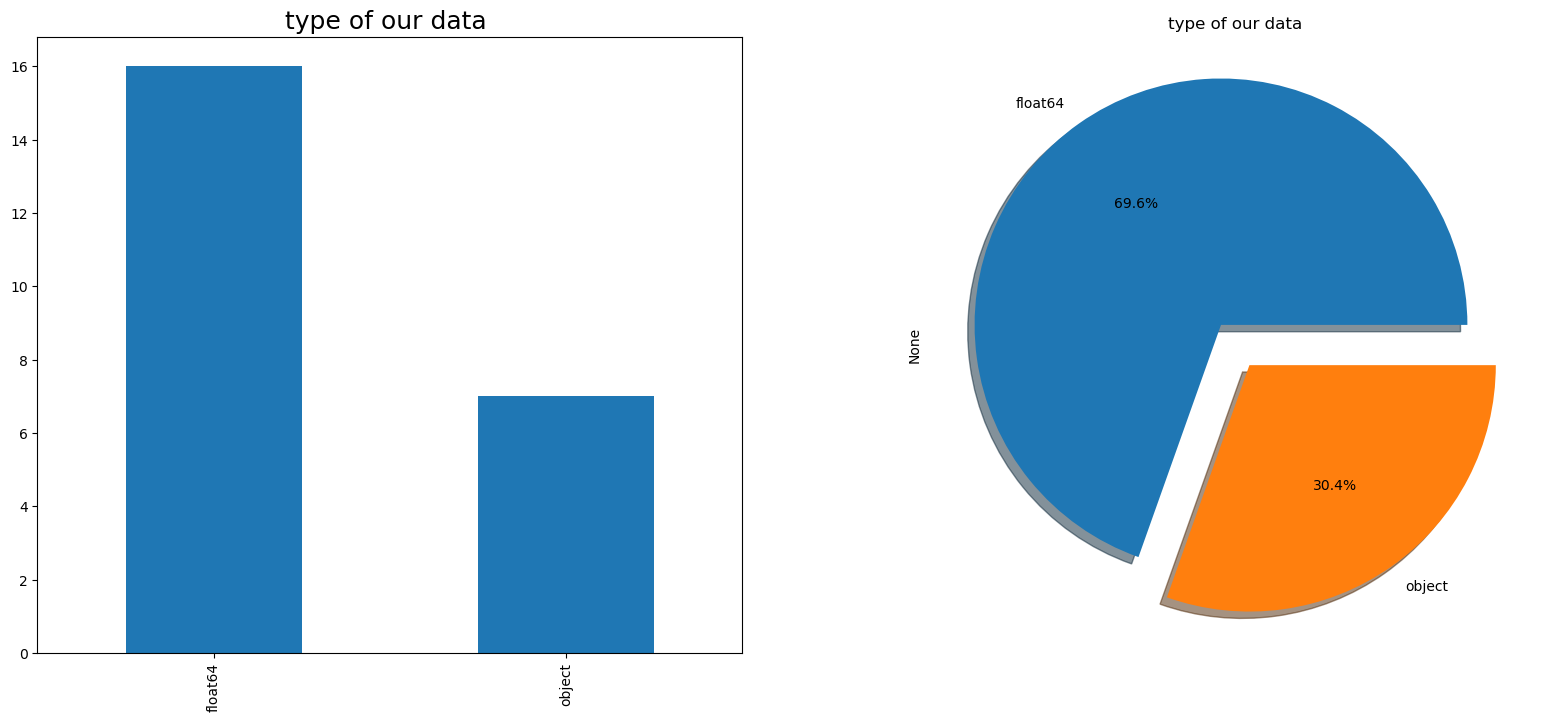

In [9]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

In [10]:
categorical_col, contin_val=[],[]

for i in df.columns:
    
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [11]:
print("The number of Categorical Values are :",len(categorical_col))
print("The number of Categorical Values are :",len(contin_val))

The number of Categorical Values are : 7
The number of Categorical Values are : 16


In [12]:
print("Unique Values in each Column:")
df.nunique()

Unique Values in each Column:


Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [13]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [14]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [15]:
df["RainTomorrow"].value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

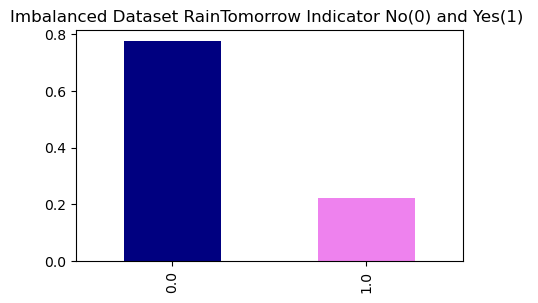

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,3))

df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['NAVY','VIOLET'])
plt.title('Imbalanced Dataset RainTomorrow Indicator No(0) and Yes(1) ')
plt.show()

In [17]:
print("The number of missing values",df.isna().sum().sum())

The number of missing values 343248


In [18]:
print("The Number of missing values according to row wise :")
df.isna().sum()

The Number of missing values according to row wise :


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [19]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


In [20]:
# Checking data completeness
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing


,no.of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


In [21]:
# all columns are now lowercase letters
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [22]:
df['date'] = pd.to_datetime(df['date']) # parse as datatime

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

df[['date', 'Year', 'Month', 'Day']] # preview changes made

df.drop('date', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

In [23]:
df.isna().sum()

location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [24]:
# Checking data completeness
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [25]:
df

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,0.0,0.0,2017,6,24


In [26]:
df.isna().sum()

location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [27]:
# Extract numerical features
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

21

In [28]:
# exrtact categorical features
cat_col=df.select_dtypes(object).columns.tolist()
len(cat_col)

4

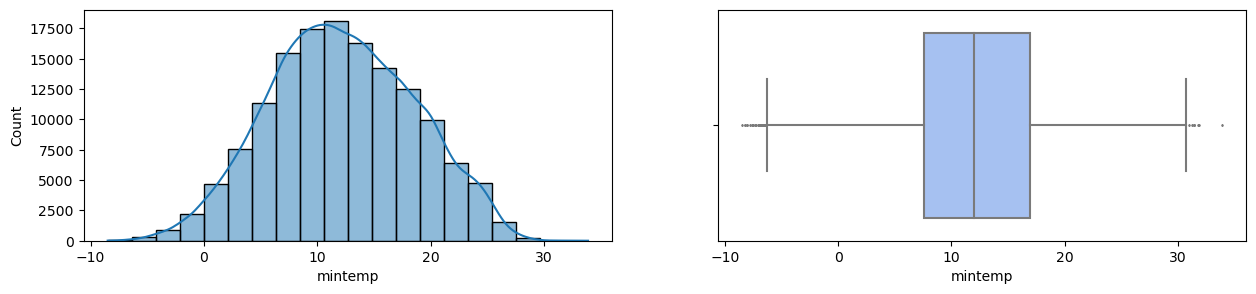

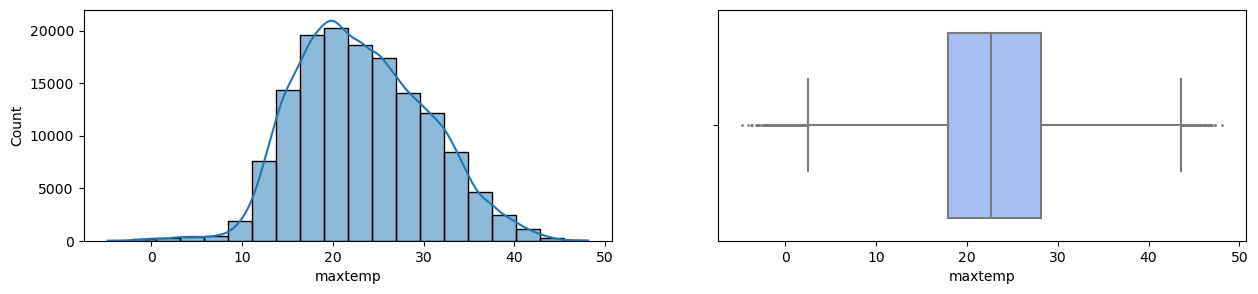

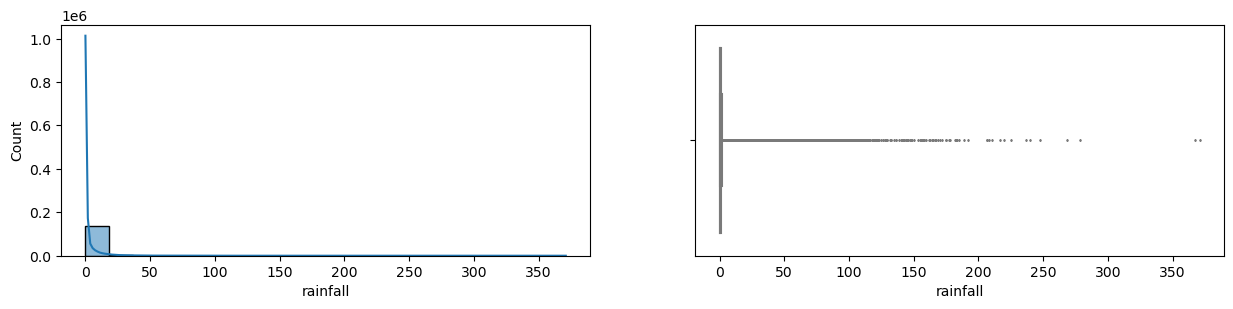

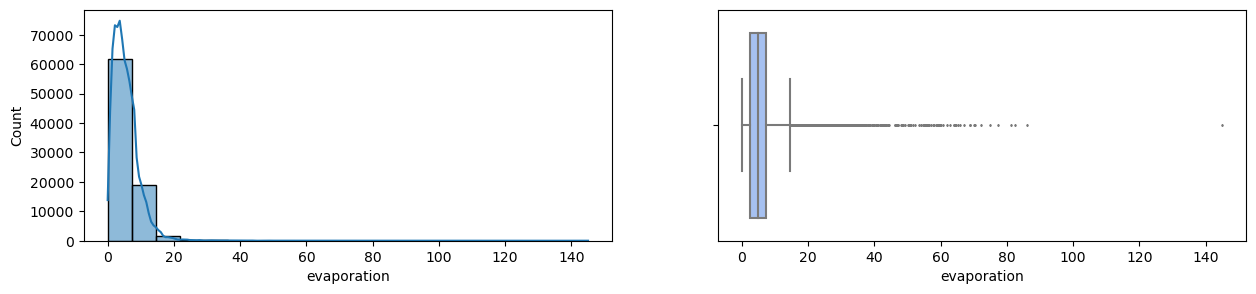

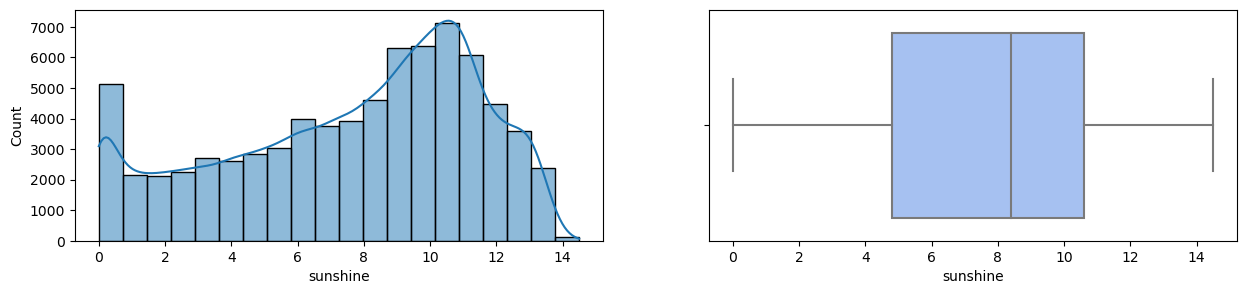

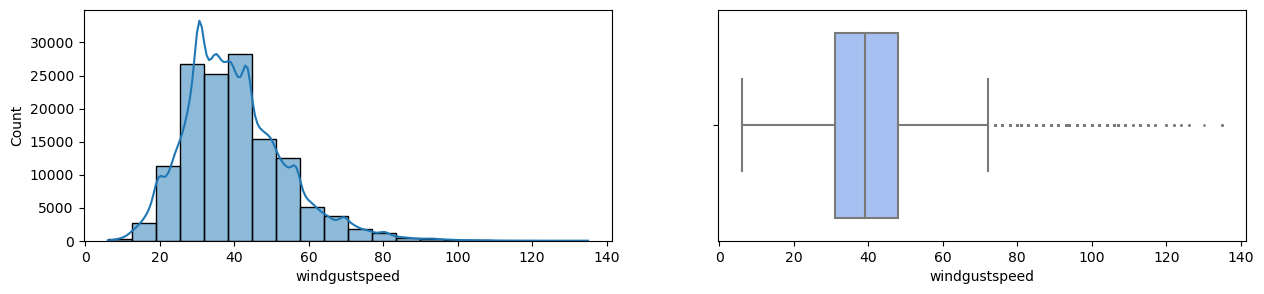

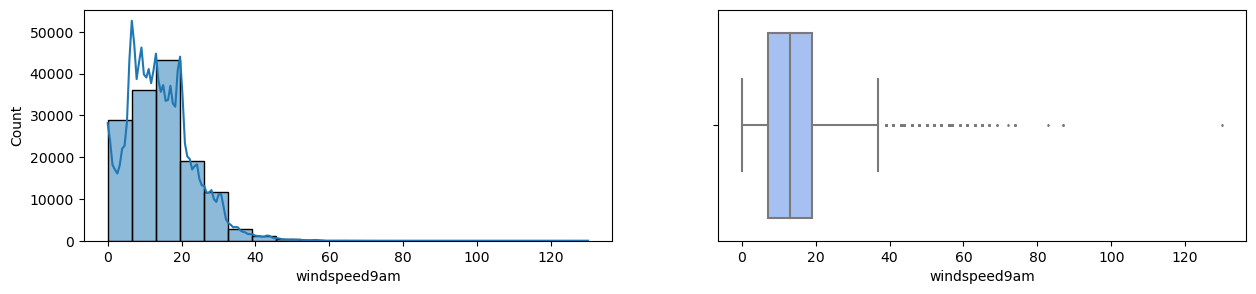

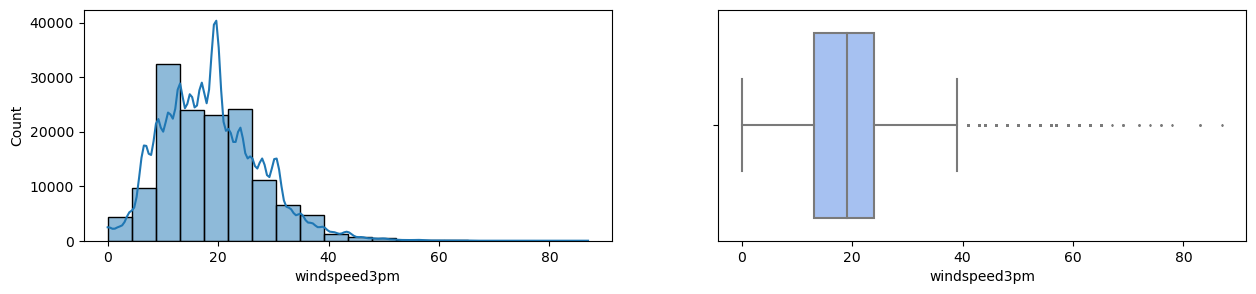

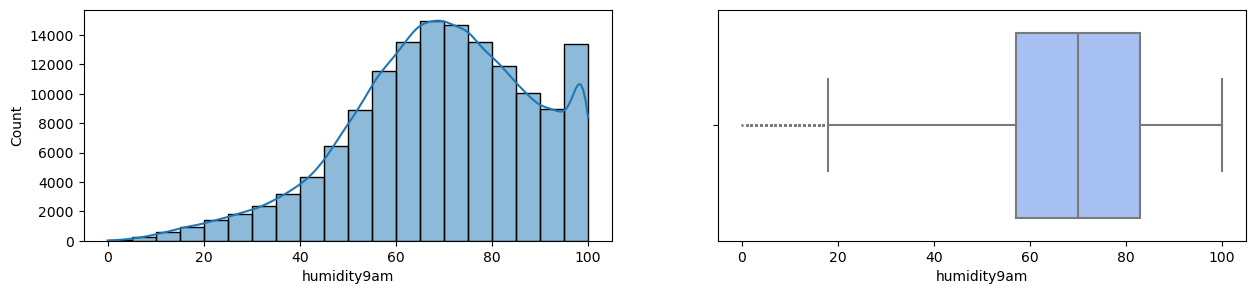

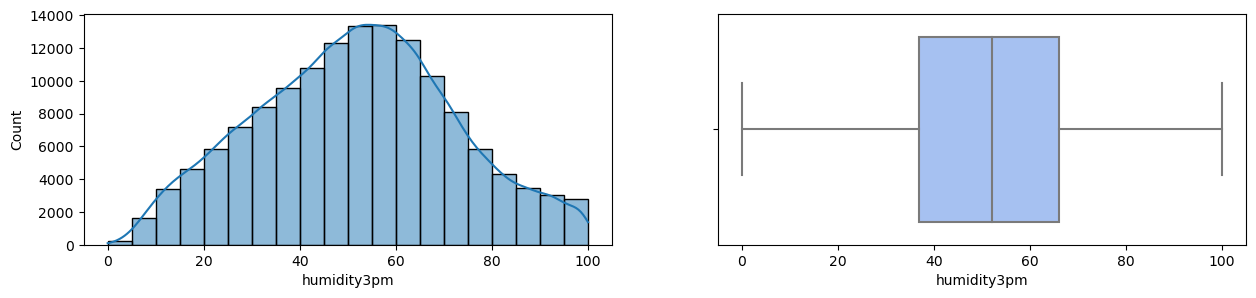

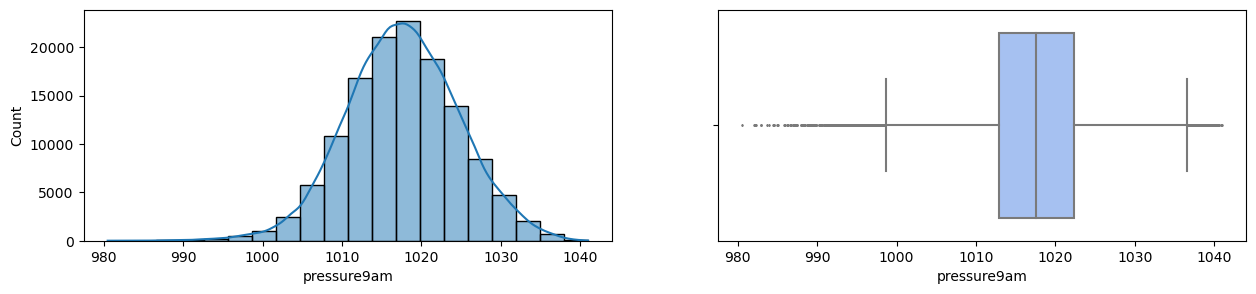

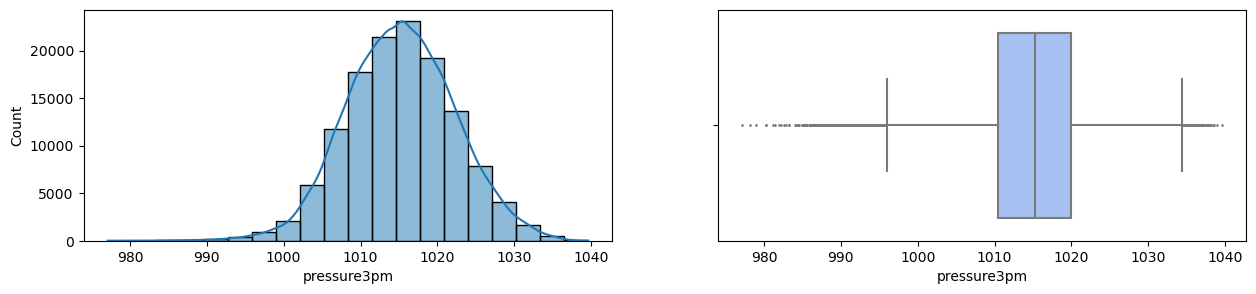

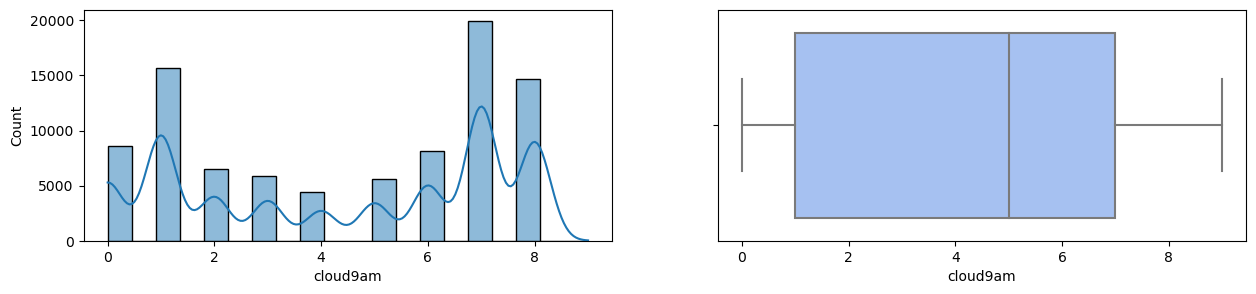

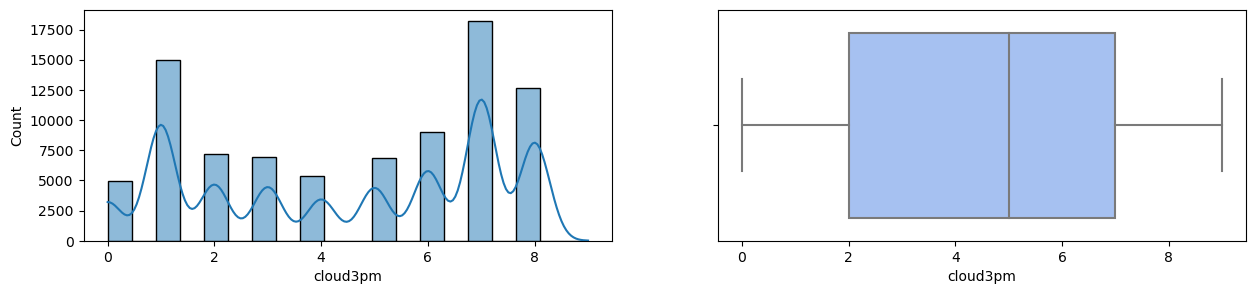

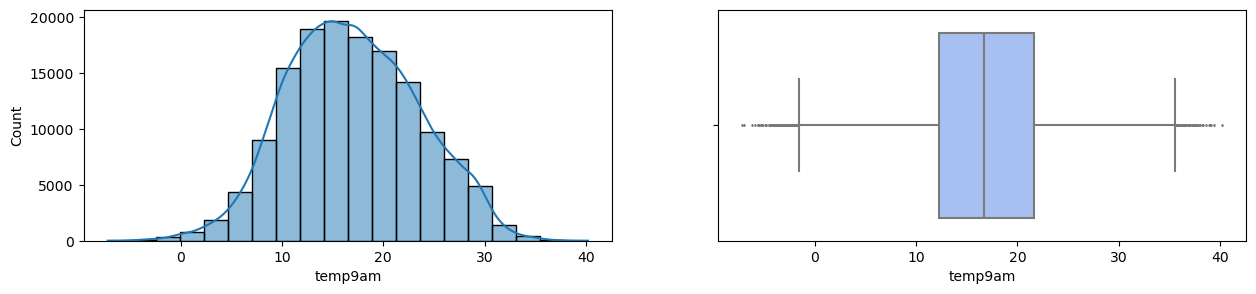

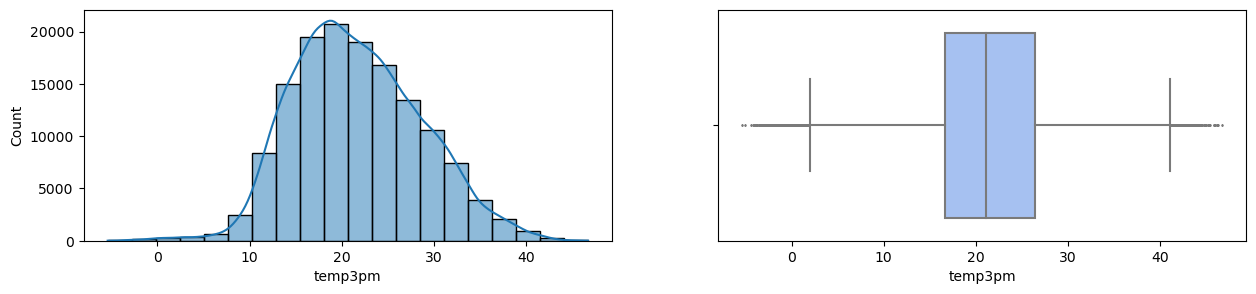

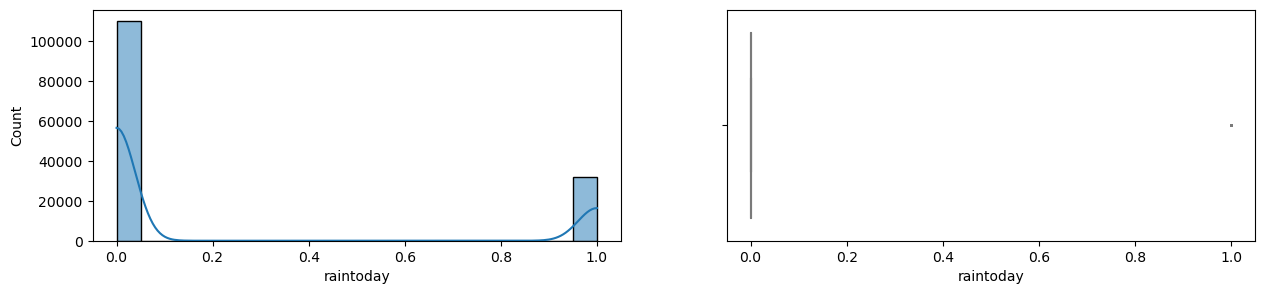

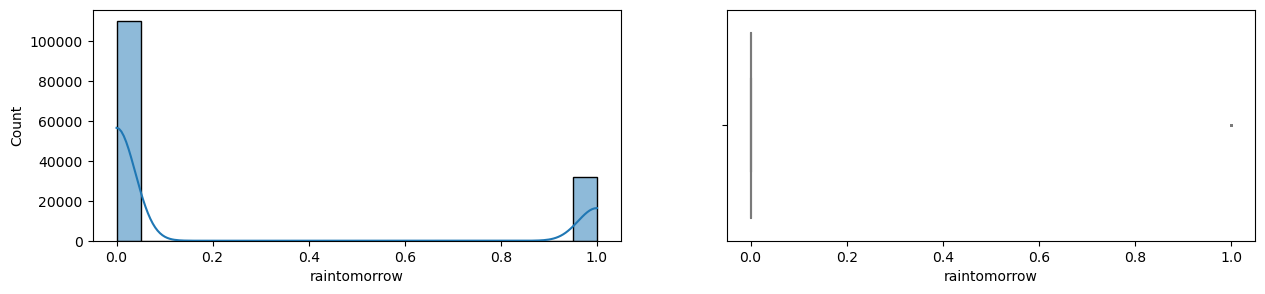

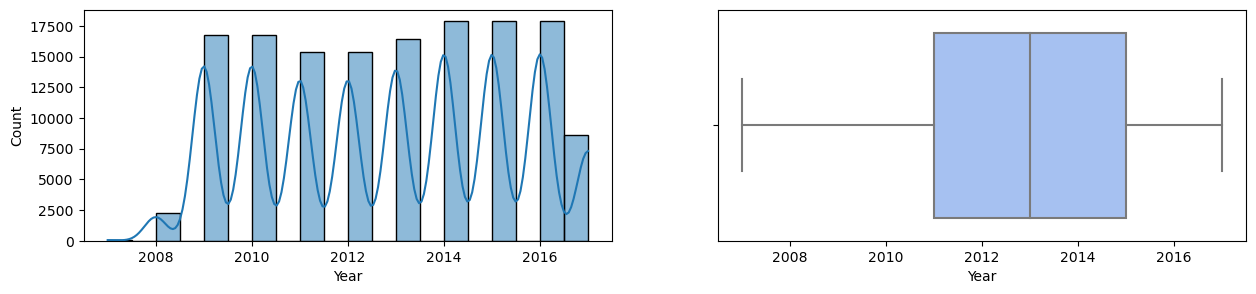

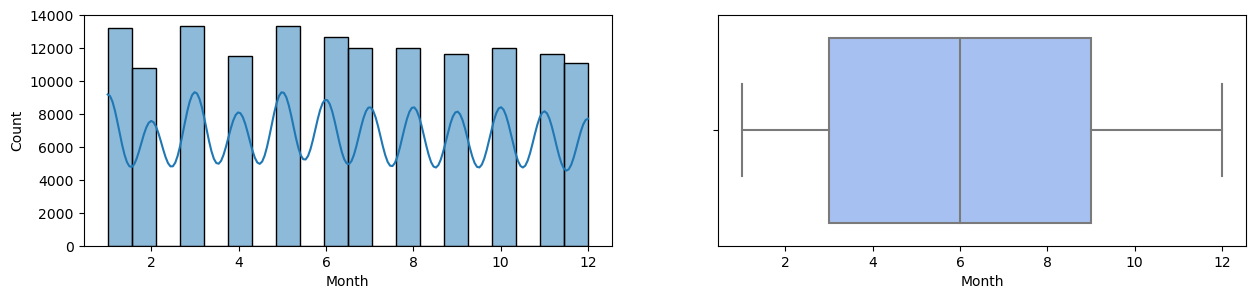

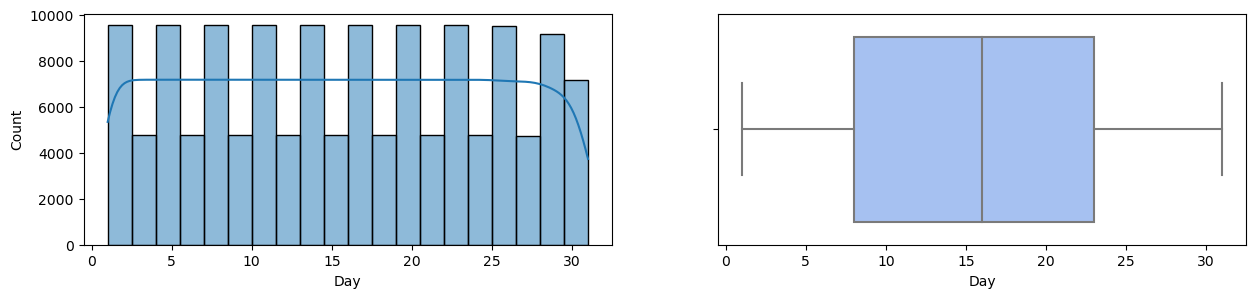

In [29]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

In [32]:
from sklearn.impute import SimpleImputer


imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 =SimpleImputer(missing_values = np.nan, strategy = 'median')
df[['evaporation']] = imputer2.fit_transform(df[['evaporation']])
df[['sunshine']] = imputer1.fit_transform(df[['sunshine']])
df[['cloud3pm']] = imputer2.fit_transform(df[['cloud3pm']])
df[['cloud9am']] = imputer1.fit_transform(df[['cloud9am']])
#mean and median are same for Pressure9am and Pressure3pm
df[['pressure9am']] = imputer1.fit_transform(df[['pressure9am']])
df[['pressure3pm']] = imputer1.fit_transform(df[['pressure3pm']])

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df.isnull().sum()

location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation          0
sunshine             0
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am          0
pressure3pm          0
cloud9am             0
cloud3pm             0
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [35]:
#Now we can drop missing values and encode categricals
df = df.dropna()

#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [36]:
df.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,4.8,7.611178,13,44.0,13,14,...,1007.1,8.000000,5.0,16.9,21.8,0.0,0.0,2008,12,1
1,1,7.4,25.1,0.0,4.8,7.611178,14,44.0,6,15,...,1007.8,4.447461,5.0,17.2,24.3,0.0,0.0,2008,12,2
2,1,12.9,25.7,0.0,4.8,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,1,9.2,28.0,0.0,4.8,7.611178,4,24.0,9,0,...,1012.8,4.447461,5.0,18.1,26.5,0.0,0.0,2008,12,4
4,1,17.5,32.3,1.0,4.8,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.0,17.8,29.7,0.0,0.0,2008,12,5


In [39]:
df.raintomorrow.value_counts()

0.0    94906
1.0    26884
Name: raintomorrow, dtype: int64

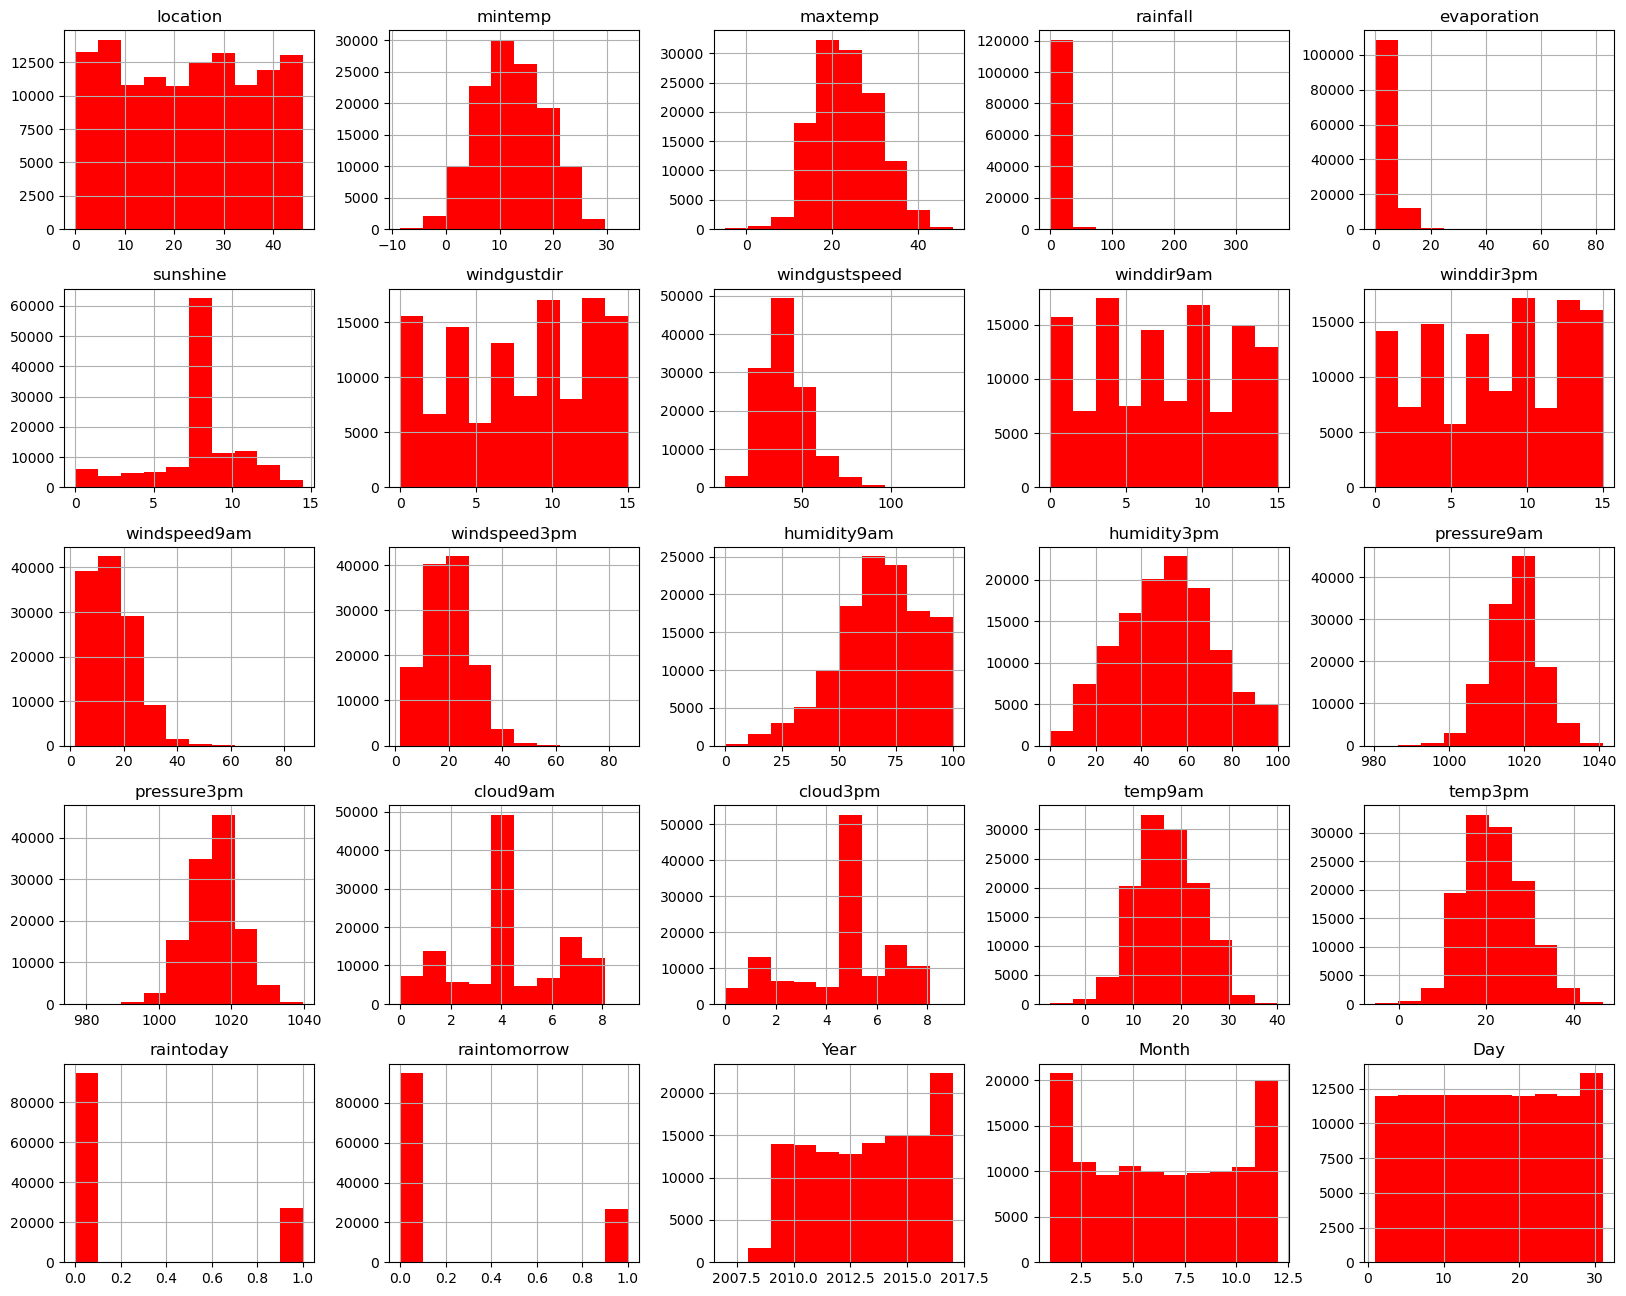

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(20,16), color = 'r');
plt.show();  #showing the charts of different columns
#This also helps in finding number of counts in each column

In [41]:
zero  = df[df['raintomorrow']==0]   #zero values in outcome column
one = df[df['raintomorrow']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 80537) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

In [42]:
zero  = df[df['raintoday']==0]   #zero values in outcome column
one = df[df['raintoday']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 108000) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

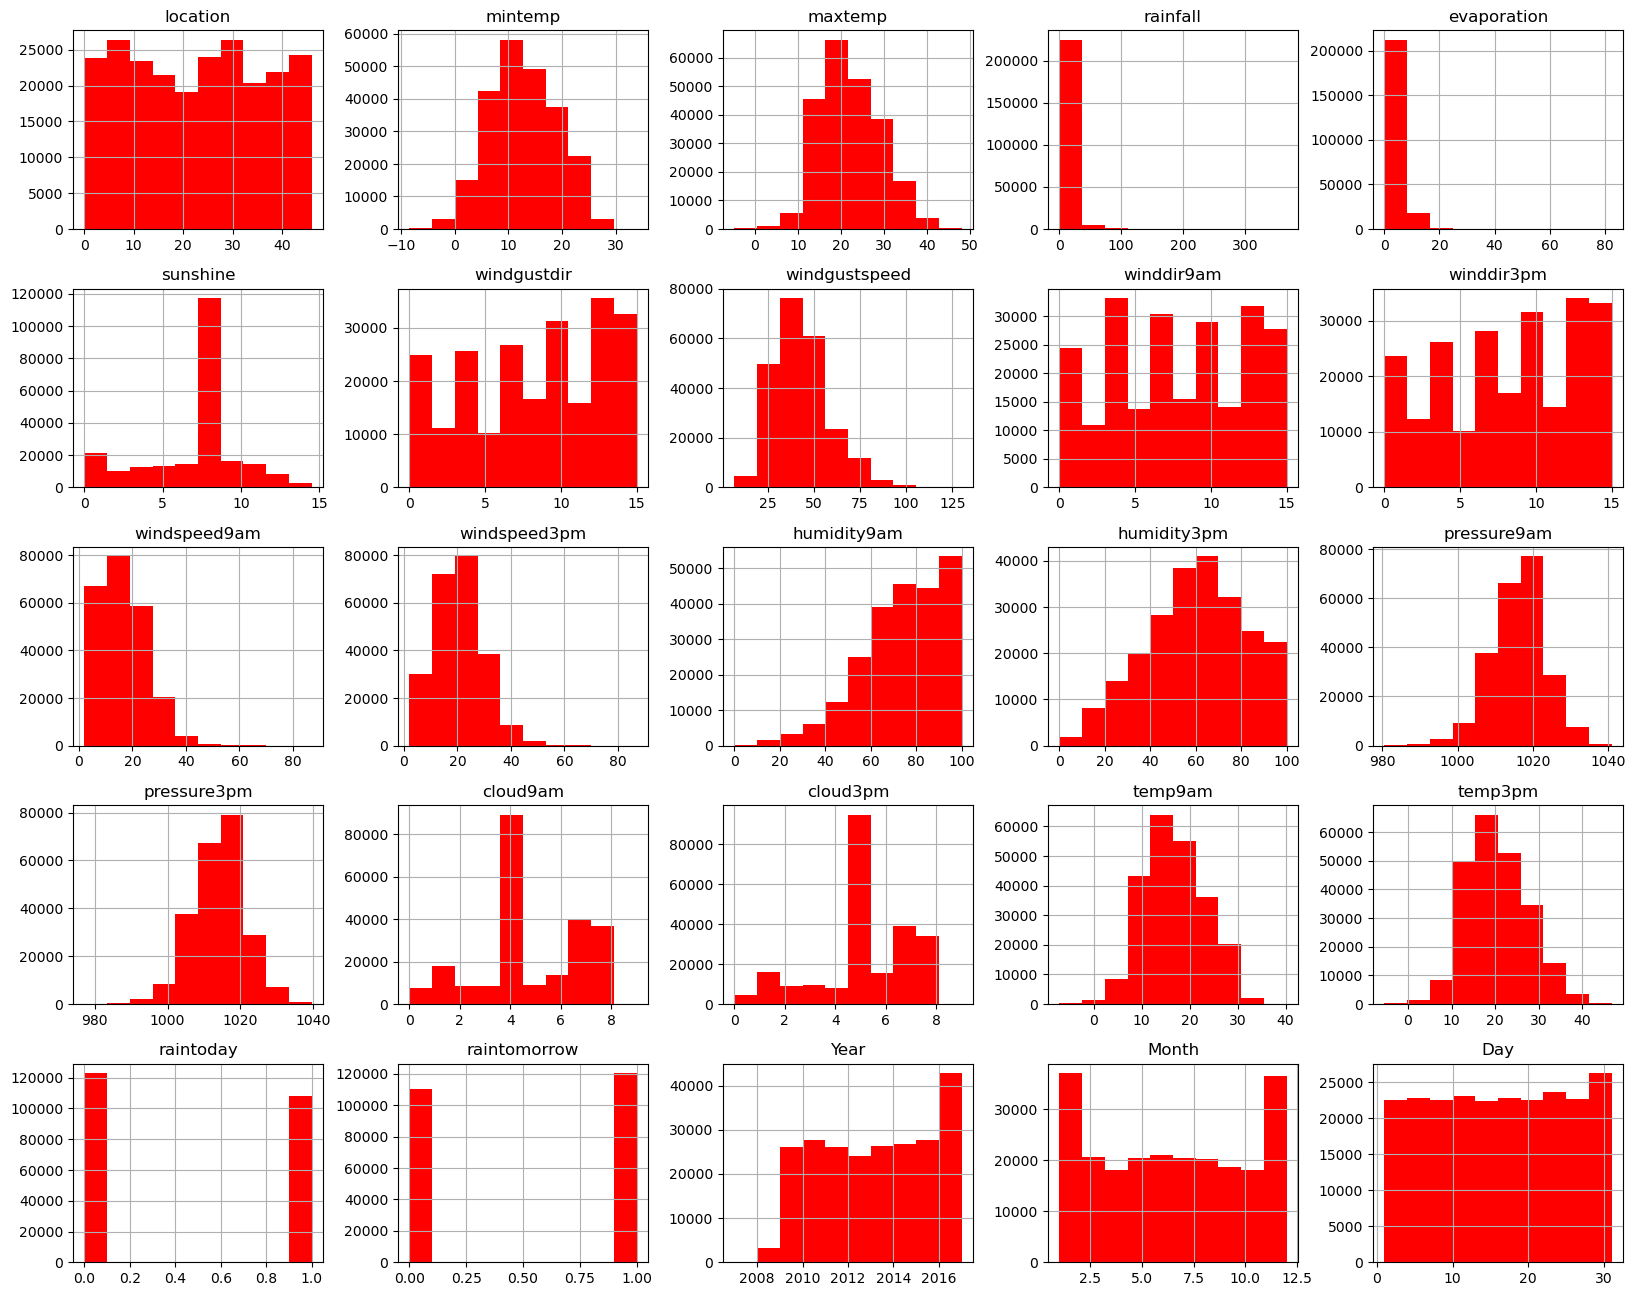

In [43]:
df.hist(figsize=(20,16), color = 'r');
plt.show();

In [45]:
#Checking which columns are mostly correlated with the target
df.corr().abs()['raintomorrow'].sort_values(ascending = False)

raintomorrow     1.000000
humidity3pm      0.537323
sunshine         0.380972
raintoday        0.372577
cloud3pm         0.369825
humidity9am      0.363198
cloud9am         0.321940
pressure9am      0.268480
windgustspeed    0.262844
pressure3pm      0.245649
rainfall         0.238631
temp3pm          0.237212
maxtemp          0.200728
evaporation      0.124925
windspeed9am     0.115016
windspeed3pm     0.110026
mintemp          0.100134
windgustdir      0.057954
temp9am          0.041925
winddir9am       0.041896
winddir3pm       0.036167
Year             0.018391
Day              0.005405
location         0.004457
Month            0.000289
Name: raintomorrow, dtype: float64

In [46]:
X = df.drop(['raintomorrow'], axis = 1)
y = df['raintomorrow']

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=15)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(231028, 15)


In [48]:
# Get columns to keep and create new dataframe with those only
cols = fs.get_support(indices=True)
X_new = X.iloc[:,cols]
X_new

,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp3pm,raintoday
97420,16.0,15.4,0.8,8.500000,41.0,13.0,20.0,82.0,58.0,1016.90000,1014.800000,4.447461,5.0,15.2,1.0
89743,33.1,0.0,7.4,11.800000,28.0,9.0,13.0,52.0,54.0,1009.90000,1006.300000,2.000000,7.0,31.6,0.0
61070,29.4,0.0,4.8,7.611178,39.0,24.0,15.0,65.0,31.0,1015.20000,1013.600000,4.447461,5.0,27.6,0.0
9074,21.3,6.4,4.8,0.300000,50.0,19.0,30.0,93.0,84.0,1016.60000,1017.800000,8.000000,8.0,19.3,1.0
86853,17.8,0.0,6.0,0.100000,19.0,6.0,4.0,37.0,46.0,1027.90000,1025.700000,8.000000,8.0,17.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36936,26.8,1.4,10.0,0.800000,33.0,4.0,7.0,79.0,73.0,1008.60000,1008.400000,7.000000,8.0,25.1,1.0
130320,19.0,2.2,1.6,12.900000,35.0,17.0,19.0,60.0,45.0,1029.30000,1026.900000,1.000000,1.0,17.0,1.0
124831,25.3,7.6,4.8,7.611178,50.0,19.0,17.0,60.0,30.0,1017.64994,1015.255889,4.447461,5.0,24.1,1.0
66582,22.3,0.4,4.8,8.000000,37.0,13.0,17.0,82.0,31.0,1025.00000,1024.800000,7.000000,2.0,21.3,0.0


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
y_train.shape

(184822,)

In [60]:
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

In [61]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
print('XGB Accuracy:', xgb.score(X_test, y_test)*100)

XGB Accuracy: 84.19902177206423


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


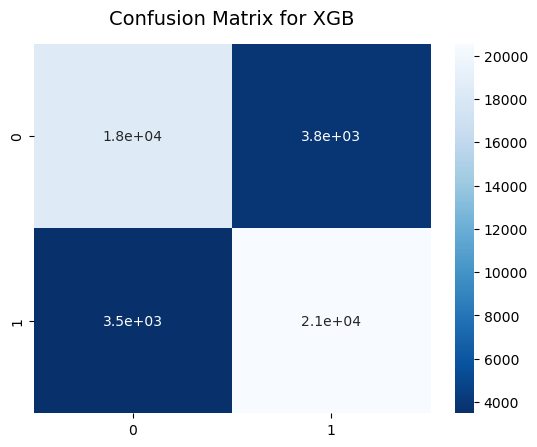

In [65]:
# Confusion Matrix of XGB
from sklearn.metrics import confusion_matrix
y_pred_xgb= xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for XGB", fontsize=14, fontname="Helvetica", y=1.03);

In [204]:
import joblib

# Assuming that you have trained a CatBoost model called 'model'
joblib.dump(xgb, 'C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/xgb.joblib')


['C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/xgb.joblib']

In [66]:
print(classification_report(y_test, y_pred_xgb));

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83     22175
         1.0       0.84      0.86      0.85     24031

    accuracy                           0.84     46206
   macro avg       0.84      0.84      0.84     46206
weighted avg       0.84      0.84      0.84     46206



In [67]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_pred = ada_model.predict(X_test)
ada_acc = ada_model.score(X_test, y_test)

In [68]:
print(ada_acc)

0.7894862139116132


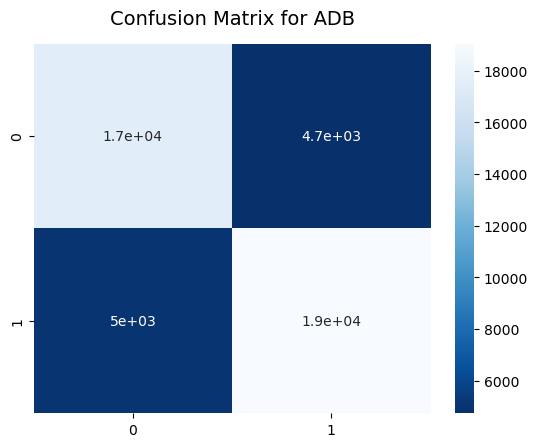

In [69]:
cf_matrix = confusion_matrix(y_test, ada_pred)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for ADB", fontsize=14, fontname="Helvetica", y=1.03);

In [70]:
print(classification_report(y_test, ada_pred));

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     22175
         1.0       0.80      0.79      0.80     24031

    accuracy                           0.79     46206
   macro avg       0.79      0.79      0.79     46206
weighted avg       0.79      0.79      0.79     46206



In [205]:
import joblib

# Assuming that you have trained a CatBoost model called 'model'
joblib.dump(xgb, 'C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/adb.joblib')


['C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/adb.joblib']

In [71]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, mean_squared_error

# define the parameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
}

# create the LightGBM datasets for train and test
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# train the LightGBM model
model = lgb.train(params, train_data, 100)

# predict the labels for the test set
y_pred_lgb = model.predict(X_test)

# convert the predictions to binary labels
y_pred_lgb = [1 if i > 0.5 else 0 for i in y_pred_lgb]

# calculate the accuracy score and mean squared error
accuracy = ada_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_lgb)

print(f"Accuracy: {accuracy}")
print(f"MSE: {mse}")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Accuracy: 0.7894862139116132
MSE: 0.18988875903562308


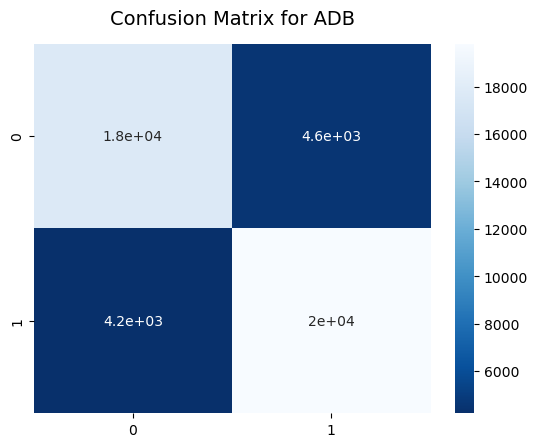

In [72]:
cf_matrix = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for LGB", fontsize=14, fontname="Helvetica", y=1.03);

In [73]:
print(classification_report(y_test, y_pred_lgb));

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80     22175
         1.0       0.81      0.82      0.82     24031

    accuracy                           0.81     46206
   macro avg       0.81      0.81      0.81     46206
weighted avg       0.81      0.81      0.81     46206



In [207]:
import joblib

# Assuming that you have trained a CatBoost model called 'model'
joblib.dump(xgb, 'C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/lgb.joblib')


['C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/lgb.joblib']

In [74]:
# Setting the hyperparameters
params = {
    'loss_function': 'Logloss',
    'eval_metric': 'Accuracy',
    'iterations': 200,
    'depth': 12,
    'learning_rate': 0.1,
    'random_seed': 42
}

# Training the model
model = cb.CatBoostClassifier(**params)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_cb = model.predict(X_test)
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred_cb]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)


0:	learn: 0.7836783	total: 647ms	remaining: 2m 8s
1:	learn: 0.7939206	total: 1.11s	remaining: 1m 49s
2:	learn: 0.7967287	total: 1.56s	remaining: 1m 42s
3:	learn: 0.8005649	total: 2.01s	remaining: 1m 38s
4:	learn: 0.8012358	total: 2.45s	remaining: 1m 35s
5:	learn: 0.8070522	total: 2.97s	remaining: 1m 35s
6:	learn: 0.8085455	total: 3.44s	remaining: 1m 34s
7:	learn: 0.8092056	total: 3.89s	remaining: 1m 33s
8:	learn: 0.8109045	total: 4.35s	remaining: 1m 32s
9:	learn: 0.8119488	total: 4.79s	remaining: 1m 31s
10:	learn: 0.8127063	total: 5.18s	remaining: 1m 29s
11:	learn: 0.8146054	total: 5.59s	remaining: 1m 27s
12:	learn: 0.8164883	total: 5.95s	remaining: 1m 25s
13:	learn: 0.8180033	total: 6.3s	remaining: 1m 23s
14:	learn: 0.8184469	total: 6.67s	remaining: 1m 22s
15:	learn: 0.8195182	total: 7.05s	remaining: 1m 21s
16:	learn: 0.8204380	total: 7.49s	remaining: 1m 20s
17:	learn: 0.8211631	total: 7.88s	remaining: 1m 19s
18:	learn: 0.8231163	total: 8.3s	remaining: 1m 19s
19:	learn: 0.8237602	tota

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


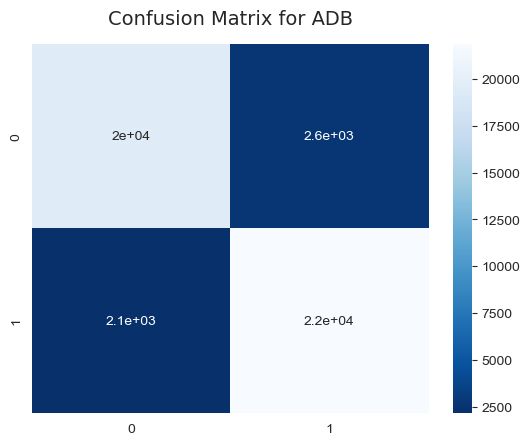

In [100]:
cf_matrix = confusion_matrix(y_test, y_pred_cb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for ADB", fontsize=14, fontname="Helvetica", y=1.03);

In [101]:
print(classification_report(y_test, y_pred_cb));

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     22175
         1.0       0.89      0.91      0.90     24031

    accuracy                           0.90     46206
   macro avg       0.90      0.90      0.90     46206
weighted avg       0.90      0.90      0.90     46206



In [206]:
import joblib

# Assuming that you have trained a CatBoost model called 'model'
joblib.dump(xgb, 'C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/cb.joblib')


['C:/Users/hp/OneDrive/Desktop/Rainfall/MODELS/cb.joblib']

In [163]:
model_list = [  "XGB","ADB","LGB","CB"]
accuracy_list=[xgb.score(X_test, y_test),ada_model.score(X_test, y_test),accuracy_score(y_test, y_pred_lgb),accuracy_score(y_test, y_pred_binary)]

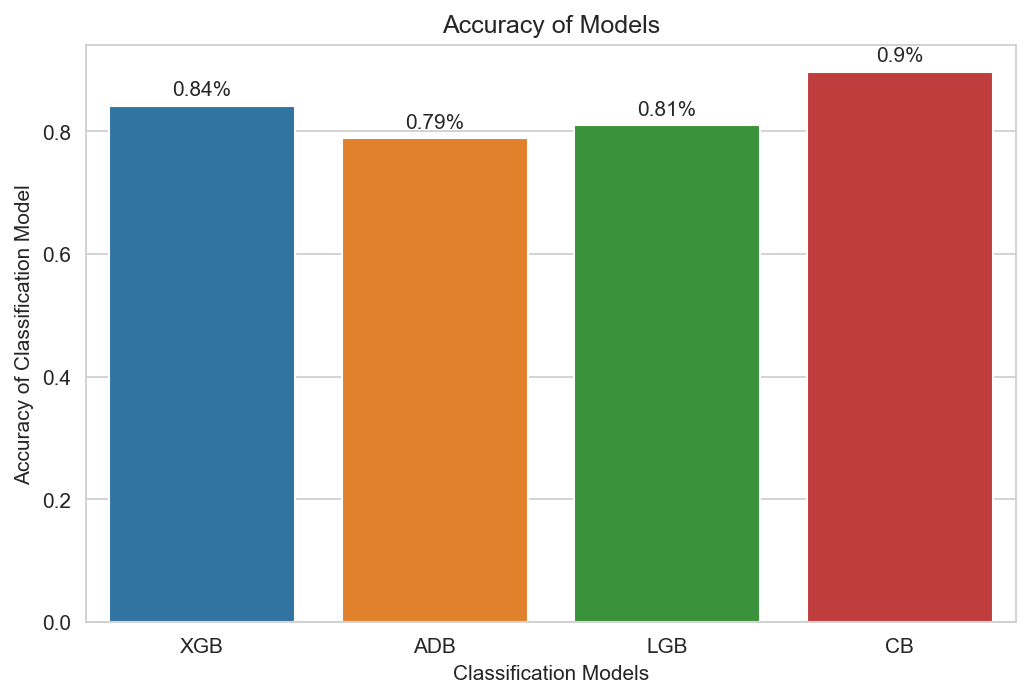

In [164]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(8,5), dpi=150)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()

In [165]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import metrics



In [166]:
acc=[]
precision=[]
recall=[]
f1=[]
f2=[]
fbeta=[]
roc=[]
pred=[]

In [167]:
pred=[y_pred_xgb, ada_pred, y_pred_lgb, y_pred_cb]

In [168]:
for i in range(4):
    print(model_list[i],"  Precison :")
    
    print(" ",precision_score(y_test,pred[i],average="micro"))
    precision.append(precision_score(y_test,pred[i],average="micro"))

XGB   Precison :
  0.8419902177206423
ADB   Precison :
  0.7894862139116132
LGB   Precison :
  0.8101112409643769
CB   Precison :
  0.8967017270484353


In [169]:
for i in range(4):
    print(model_list[i],"  Recall :")
    
    print(" ",recall_score(y_test,pred[i],average="micro"))
    recall.append(recall_score(y_test,pred[i],average="micro"))

XGB   Recall :
  0.8419902177206423
ADB   Recall :
  0.7894862139116132
LGB   Recall :
  0.8101112409643769
CB   Recall :
  0.8967017270484353


In [170]:
for i in range(4):
    print(model_list[i],"  F1-SCORE :")
    
    print(" ",f1_score(y_test,pred[i],average="micro"))
    f1.append(f1_score(y_test,pred[i],average="micro"))

XGB   F1-SCORE :
  0.8419902177206422
ADB   F1-SCORE :
  0.7894862139116133
LGB   F1-SCORE :
  0.8101112409643768
CB   F1-SCORE :
  0.8967017270484353


In [171]:
for i in range(4):
    print(model_list[i]," FBETA-SCORE :")
    
    print(" ",fbeta_score(y_test,pred[i], average='weighted', beta=0.5))
    fbeta.append(fbeta_score(y_test,pred[i], average='weighted', beta=0.5))

XGB  FBETA-SCORE :
  0.8419453226757735
ADB  FBETA-SCORE :
  0.7895667697123455
LGB  FBETA-SCORE :
  0.8100483221412579
CB  FBETA-SCORE :
  0.8967083542373371


In [172]:
for i in range(4):
    print(model_list[i]," F2-SCORE :")
    
    print(" ",fbeta_score(y_test,pred[i], average='weighted', beta=0.2))
    f2.append(fbeta_score(y_test,pred[i], average='weighted', beta=0.2))

XGB  F2-SCORE :
  0.8419651563202989
ADB  F2-SCORE :
  0.7895959423253651
LGB  F2-SCORE :
  0.8100610355904275
CB  F2-SCORE :
  0.8967707938034866


In [173]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [174]:
for i in range(4):
    print(model_list[i]," ROC-CURVE : ")
    print(multiclass_roc_auc_score(y_test,pred[i]))
    roc.append(multiclass_roc_auc_score(y_test,pred[i]))

XGB  ROC-CURVE : 
0.8414362029653824
ADB  ROC-CURVE : 
0.7893523711879671
LGB  ROC-CURVE : 
0.8095187684340647
CB  ROC-CURVE : 
0.8961142280660873


In [175]:
print(accuracy_list)

[0.8419902177206423, 0.7894862139116132, 0.8101112409643769, 0.8967017270484353]


In [176]:
print(f1)
print(f2)
print(fbeta)
print(recall)
print(precision)
print(roc)

[0.8419902177206422, 0.7894862139116133, 0.8101112409643768, 0.8967017270484353]
[0.8419651563202989, 0.7895959423253651, 0.8100610355904275, 0.8967707938034866]
[0.8419453226757735, 0.7895667697123455, 0.8100483221412579, 0.8967083542373371]
[0.8419902177206423, 0.7894862139116132, 0.8101112409643769, 0.8967017270484353]
[0.8419902177206423, 0.7894862139116132, 0.8101112409643769, 0.8967017270484353]
[0.8414362029653824, 0.7893523711879671, 0.8095187684340647, 0.8961142280660873]


In [177]:
venkat={"MODELS":model_list,"ACCURACY":accuracy_list,"PRECISION":precision,"RECALL":recall,"F1-SCORE":f1,"F2-SCORE":f2,"FBETA-SCORE":fbeta,"ROC":roc}


In [178]:
venkat

{'MODELS': ['XGB', 'ADB', 'LGB', 'CB'],
 'ACCURACY': [0.8419902177206423,
  0.7894862139116132,
  0.8101112409643769,
  0.8967017270484353],
 'PRECISION': [0.8419902177206423,
  0.7894862139116132,
  0.8101112409643769,
  0.8967017270484353],
 'RECALL': [0.8419902177206423,
  0.7894862139116132,
  0.8101112409643769,
  0.8967017270484353],
 'F1-SCORE': [0.8419902177206422,
  0.7894862139116133,
  0.8101112409643768,
  0.8967017270484353],
 'F2-SCORE': [0.8419651563202989,
  0.7895959423253651,
  0.8100610355904275,
  0.8967707938034866],
 'FBETA-SCORE': [0.8419453226757735,
  0.7895667697123455,
  0.8100483221412579,
  0.8967083542373371],
 'ROC': [0.8414362029653824,
  0.7893523711879671,
  0.8095187684340647,
  0.8961142280660873]}

In [179]:
results=pd.DataFrame(venkat)

In [180]:
results

,MODELS,ACCURACY,PRECISION,RECALL,F1-SCORE,F2-SCORE,FBETA-SCORE,ROC
0,XGB,0.841990,0.841990,0.841990,0.841990,0.841965,0.841945,0.841436
1,ADB,0.789486,0.789486,0.789486,0.789486,0.789596,0.789567,0.789352
2,LGB,0.810111,0.810111,0.810111,0.810111,0.810061,0.810048,0.809519
3,CB,0.896702,0.896702,0.896702,0.896702,0.896771,0.896708,0.896114


In [181]:
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test,y_pred_xgb)
cm_adb = confusion_matrix(y_test,ada_pred)
cm_lgb = confusion_matrix(y_test,y_pred_lgb)
cm_cb = confusion_matrix(y_test,y_pred_cb)

(array([0.5, 1.5]), [Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')])

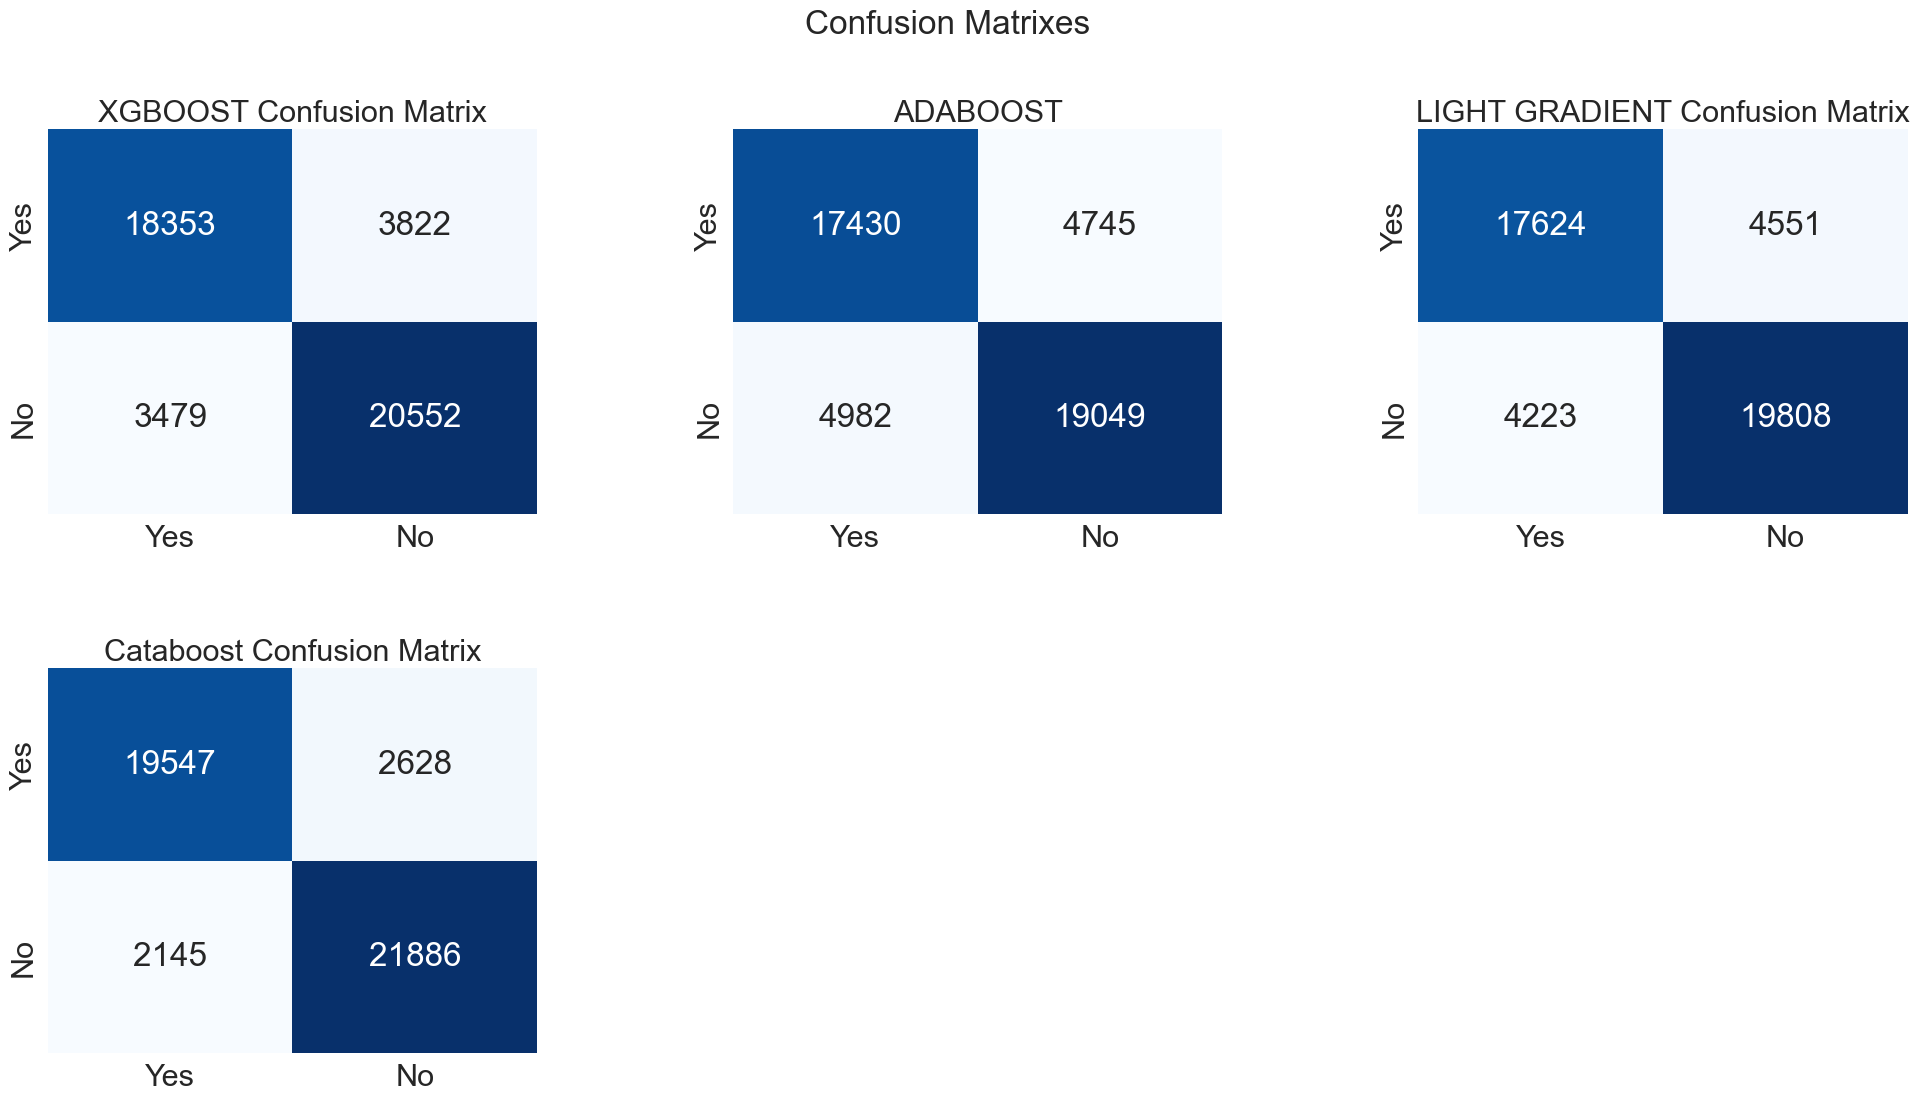

In [182]:
plt.figure(figsize=(24,12))


plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("XGBOOST Confusion Matrix",fontsize=22)
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.subplot(2,3,2)
plt.title("ADABOOST",fontsize=22)
sns.heatmap(cm_adb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24} ,xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.subplot(2,3,3)
plt.title("LIGHT GRADIENT Confusion Matrix",fontsize=22)
sns.heatmap(cm_lgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.subplot(2,3,4)
plt.title("Cataboost Confusion Matrix",fontsize=22)
sns.heatmap(cm_cb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)



In [183]:
df=results

In [184]:

# Extract the data into separate lists
models = df['MODELS'].tolist()
accuracy = df['ACCURACY'].tolist()
precision = df['PRECISION'].tolist()
recall = df['RECALL'].tolist()
f1_score = df['F1-SCORE'].tolist()
f2_score = df['F2-SCORE'].tolist()
fbeta_score = df['FBETA-SCORE'].tolist()
roc = df['ROC'].tolist()

# Print the lists
print("Models:", models)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("F2-score:", f2_score)
print("FBeta-score:", fbeta_score)
print("ROC:", roc)


Models: ['XGB', 'ADB', 'LGB', 'CB']
Accuracy: [0.8419902177206423, 0.7894862139116132, 0.8101112409643769, 0.8967017270484353]
Precision: [0.8419902177206423, 0.7894862139116132, 0.8101112409643769, 0.8967017270484353]
Recall: [0.8419902177206423, 0.7894862139116132, 0.8101112409643769, 0.8967017270484353]
F1-score: [0.8419902177206422, 0.7894862139116133, 0.8101112409643768, 0.8967017270484353]
F2-score: [0.8419651563202989, 0.7895959423253651, 0.8100610355904275, 0.8967707938034866]
FBeta-score: [0.8419453226757735, 0.7895667697123455, 0.8100483221412579, 0.8967083542373371]
ROC: [0.8414362029653824, 0.7893523711879671, 0.8095187684340647, 0.8961142280660873]


In [187]:
# create trace for each metric
import plotly.express as px
import plotly.graph_objects as go
trace_acc = go.Bar(
    x=models,
    y=accuracy,
    name='Accuracy',
    marker=dict(color='#636efa')
)

trace_prec = go.Bar(
    x=models,
    y=precision,
    name='Precision',
    marker=dict(color='#ef553b')
)

trace_rec = go.Bar(
    x=models,
    y=recall,
    name='Recall',
    marker=dict(color='#00cc96')
)

trace_f1 = go.Bar(
    x=models,
    y=f1_score,
    name='F1-Score',
    marker=dict(color='#ab63fa')
)

# create list of labels for each bar trace
labels = [f'{val:.3f}' for val in accuracy+precision+recall+f1_score]
labels_acc = labels[:len(models)]
labels_prec = labels[len(models):2*len(models)]
labels_rec = labels[2*len(models):3*len(models)]
labels_f1 = labels[3*len(models):]

# set text attribute of each bar trace to the corresponding label list
trace_acc.text = labels_acc
trace_prec.text = labels_prec
trace_rec.text = labels_rec
trace_f1.text = labels_f1

# create figure
fig = go.Figure(data=[trace_acc, trace_prec, trace_rec, trace_f1])

# update layout to adjust margins and font sizes
fig.update_layout(
    title='Model Evaluation Metrics',
    xaxis=dict(title='Models', title_font=dict(size=16)),
    yaxis=dict(title='Score', title_font=dict(size=16)),
    barmode='group',
    font=dict(size=14),
    margin=dict(t=100, b=50, l=50, r=50),
    legend=dict(bgcolor='rgba(0,0,0,0)')
)

# show the figure
fig.show()


In [188]:
models

['XGB', 'ADB', 'LGB', 'CB']

In [189]:
models.append("ANN")

In [190]:
models.append("LSTM")
models

['XGB', 'ADB', 'LGB', 'CB', 'ANN', 'LSTM']

In [191]:
accuracy.append(0.9339951123510457)
accuracy.append(0.9386673014911161)
accuracy

[0.8419902177206423,
 0.7894862139116132,
 0.8101112409643769,
 0.8967017270484353,
 0.9339951123510457,
 0.9386673014911161]

In [192]:
precision.append(0.9132617049643166)
precision.append(0.927952047952048)
precision

[0.8419902177206423,
 0.7894862139116132,
 0.8101112409643769,
 0.8967017270484353,
 0.9132617049643166,
 0.927952047952048]

In [193]:
recall.append(0.9651885619560713)
recall.append(0.9651885619560713)
recall

[0.8419902177206423,
 0.7894862139116132,
 0.8101112409643769,
 0.8967017270484353,
 0.9651885619560713,
 0.9651885619560713]

In [194]:
f1_score.append(0.9385074145712444)
f1_score.append(0.9424895490888429)
f1_score

[0.8419902177206422,
 0.7894862139116133,
 0.8101112409643768,
 0.8967017270484353,
 0.9385074145712444,
 0.9424895490888429]

In [195]:
# create trace for each metric
import plotly.express as px
import plotly.graph_objects as go
trace_acc = go.Bar(
    x=models,
    y=accuracy,
    name='Accuracy',
    marker=dict(color='#636efa')
)

trace_prec = go.Bar(
    x=models,
    y=precision,
    name='Precision',
    marker=dict(color='#ef553b')
)

trace_rec = go.Bar(
    x=models,
    y=recall,
    name='Recall',
    marker=dict(color='#00cc96')
)

trace_f1 = go.Bar(
    x=models,
    y=f1_score,
    name='F1-Score',
    marker=dict(color='#ab63fa')
)

# create list of labels for each bar trace
labels = [f'{val:.3f}' for val in accuracy+precision+recall+f1_score]
labels_acc = labels[:len(models)]
labels_prec = labels[len(models):2*len(models)]
labels_rec = labels[2*len(models):3*len(models)]
labels_f1 = labels[3*len(models):]

# set text attribute of each bar trace to the corresponding label list
trace_acc.text = labels_acc
trace_prec.text = labels_prec
trace_rec.text = labels_rec
trace_f1.text = labels_f1

# create figure
fig = go.Figure(data=[trace_acc, trace_prec, trace_rec, trace_f1])

# update layout to adjust margins and font sizes
fig.update_layout(
    title='Model Evaluation Metrics',
    xaxis=dict(title='Models', title_font=dict(size=16)),
    yaxis=dict(title='Score', title_font=dict(size=16)),
    barmode='group',
    font=dict(size=14),
    margin=dict(t=100, b=50, l=50, r=50),
    legend=dict(bgcolor='rgba(0,0,0,0)')
)

# show the figure
fig.show()


In [198]:
venkat={"MODELS":models,"ACCURACY":accuracy,"PRECISION":precision,"RECALL":recall,"F1-SCORE":f1_score}


In [199]:
results=pd.DataFrame(venkat)

In [200]:
results

,MODELS,ACCURACY,PRECISION,RECALL,F1-SCORE
0,XGB,0.841990,0.841990,0.841990,0.841990
1,ADB,0.789486,0.789486,0.789486,0.789486
2,LGB,0.810111,0.810111,0.810111,0.810111
3,CB,0.896702,0.896702,0.896702,0.896702
4,ANN,0.933995,0.913262,0.965189,0.938507
5,LSTM,0.938667,0.927952,0.965189,0.942490


In [203]:
results.to_csv("C:/Users/hp/OneDrive/Desktop/Rainfall/RESULTS/RESULTS OF COMPARSION.csv")